# Predictive Maintenance Classification

# I. Data Preprocessing

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv('predictive_maintenance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [3]:
df.apply(lambda x: x.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [4]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [5]:
df = df.drop(["UDI","Product ID"],axis=1)
df.columns = df.columns.str.translate("".maketrans({"[":"(", "]":")","<":"^"}))

## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ] 
df["Air temperature (K)"] = df["Air temperature (K)"] - 272.15
df["Process temperature (K)"] = df["Process temperature (K)"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature (K)" : "Air temperature (C)", "Process temperature (K)" : "Process temperature (C)"}, inplace=True)

df["Temperature difference (C)"] = df["Process temperature (C)"] - df["Air temperature (C)"]  # °
df.sample(5)

,Type,Air temperature (C),Process temperature (C),Rotational speed (rpm),Torque (Nm),Tool wear (min),Target,Failure Type,Temperature difference (C)
9035,M,25.15,35.95,1731,27.7,42,0,No Failure,10.8
593,L,25.35,37.45,1312,50.7,0,0,No Failure,12.1
1147,M,24.95,35.85,1690,25.6,159,0,No Failure,10.9
1311,L,26.75,37.95,1587,30.2,162,0,No Failure,11.2
3188,M,27.95,37.05,1438,51.0,211,0,No Failure,9.1


In [6]:
df.sample(6).style.set_properties(
    **{
        'background-color': 'Green',
        'color': 'white',
        'border-color': 'White'
    })

,Type,Air temperature (C),Process temperature (C),Rotational speed (rpm),Torque (Nm),Tool wear (min),Target,Failure Type,Temperature difference (C)
3151,L,28.350000,37.650000,1428,43.800000,119,0,No Failure,9.300000
3272,M,29.150000,37.850000,1593,30.800000,210,0,No Failure,8.700000
5024,L,31.750000,40.950000,1639,29.000000,95,0,No Failure,9.200000
3990,H,30.050000,39.050000,1692,28.200000,122,0,No Failure,9.000000
7268,L,28.350000,38.450000,1543,36.200000,30,0,No Failure,10.100000
6186,M,28.950000,38.850000,1413,46.600000,30,0,No Failure,9.900000


In [7]:
display(df.shape)
display(df.size)

(10000, 9)

90000

In [8]:
df.describe().style.background_gradient(cmap="magma")

,Air temperature (C),Process temperature (C),Rotational speed (rpm),Torque (Nm),Tool wear (min),Target,Temperature difference (C)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


## Explorfatory Data Analysis EDA

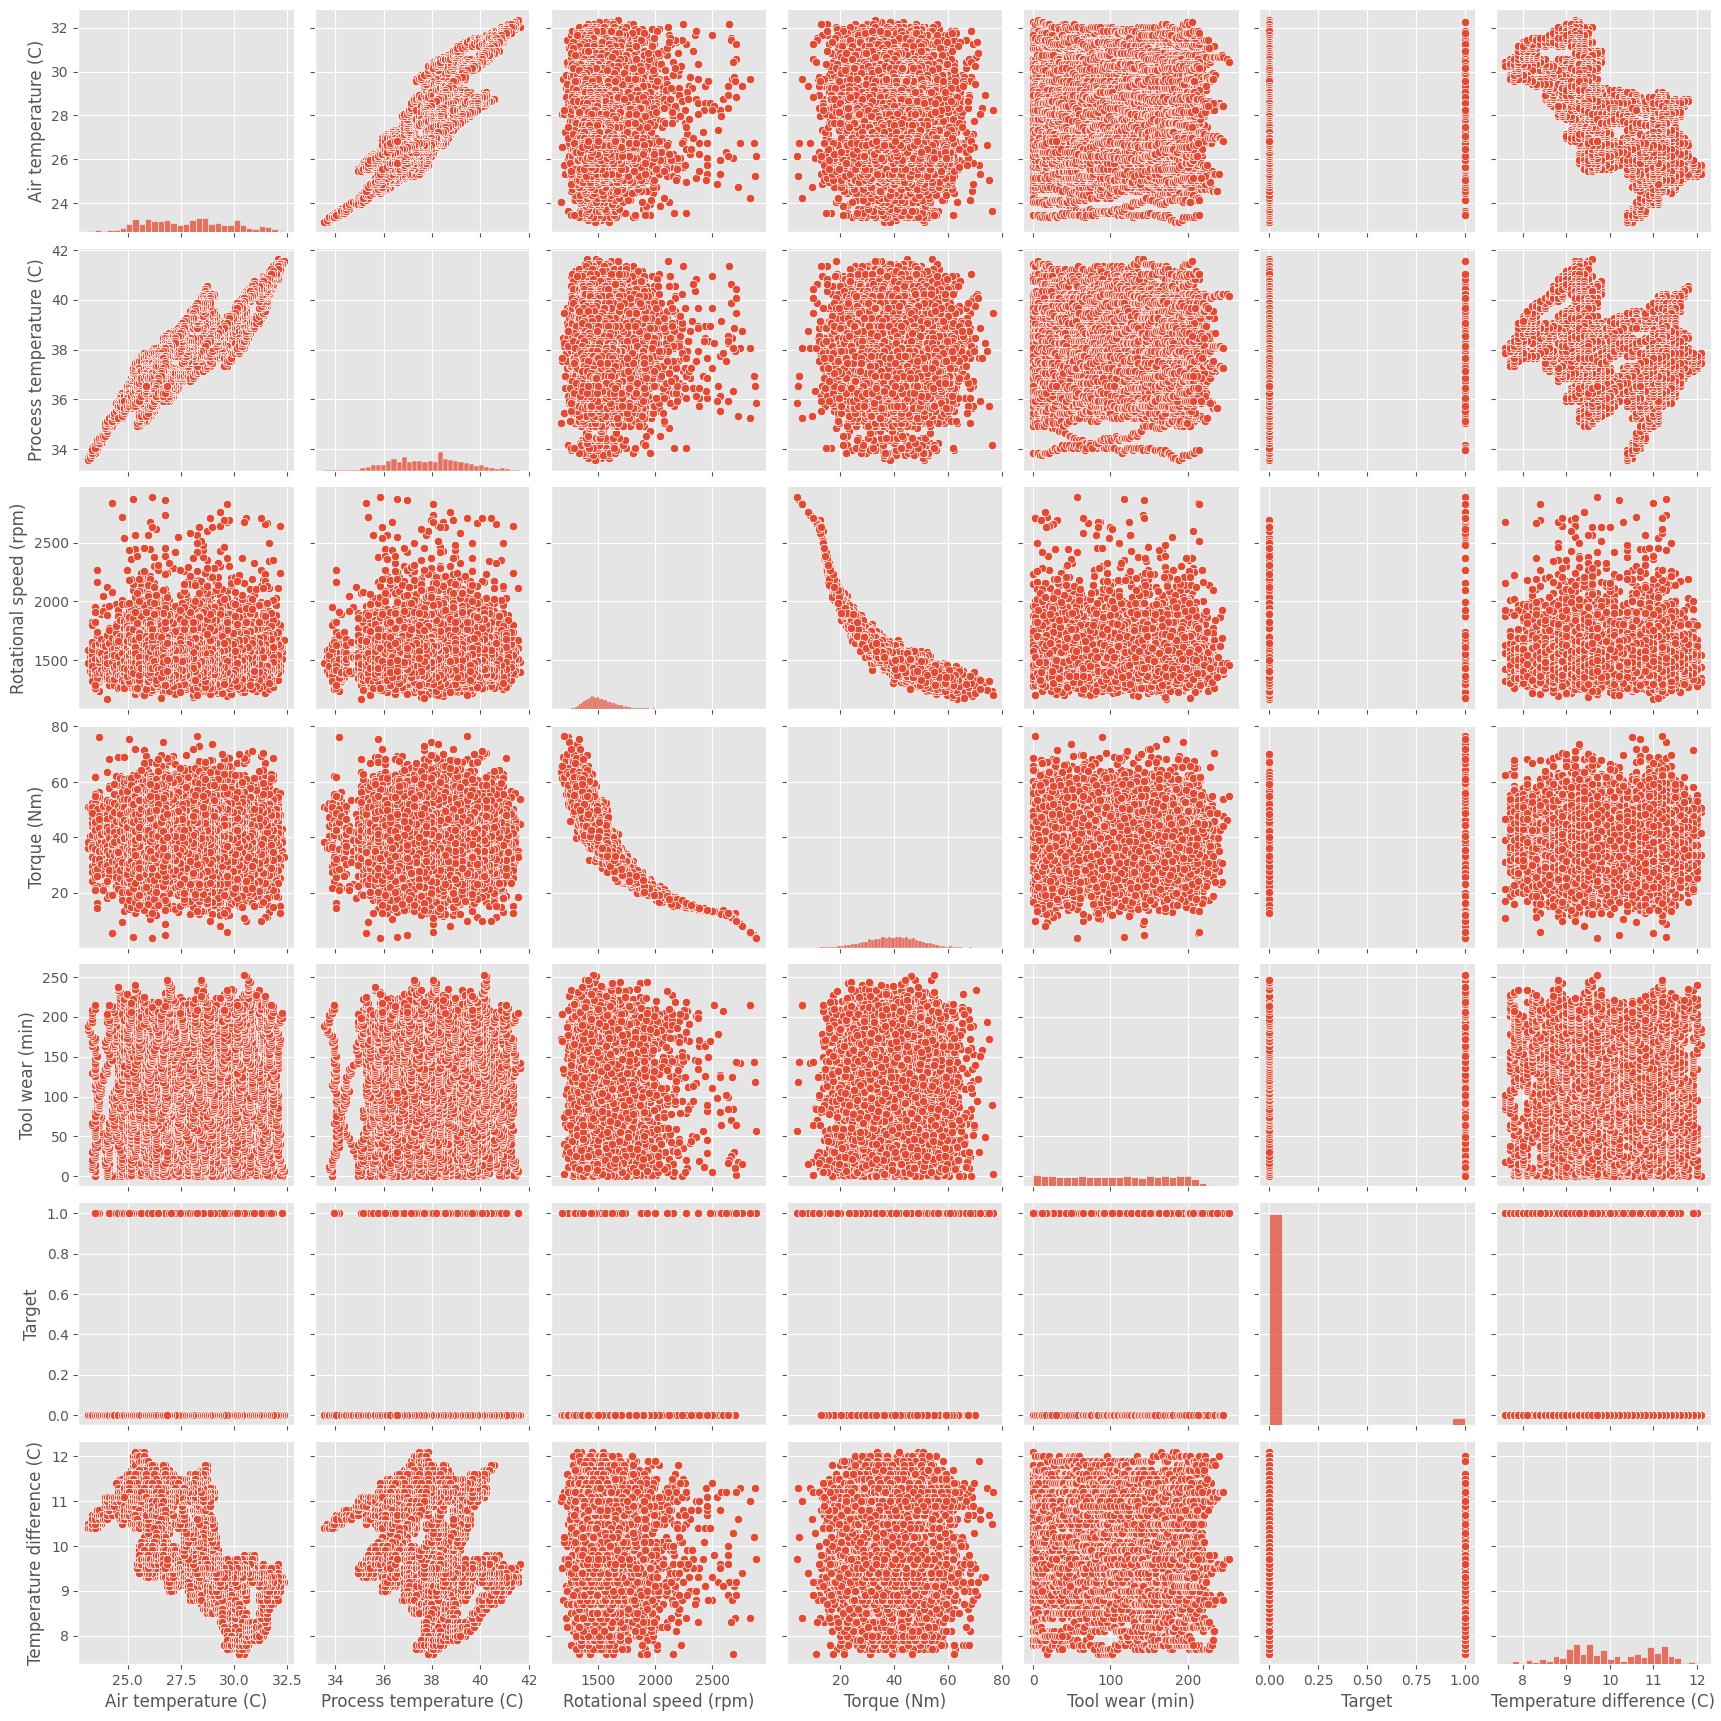

In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.style.use('ggplot')

sns.pairplot(df)

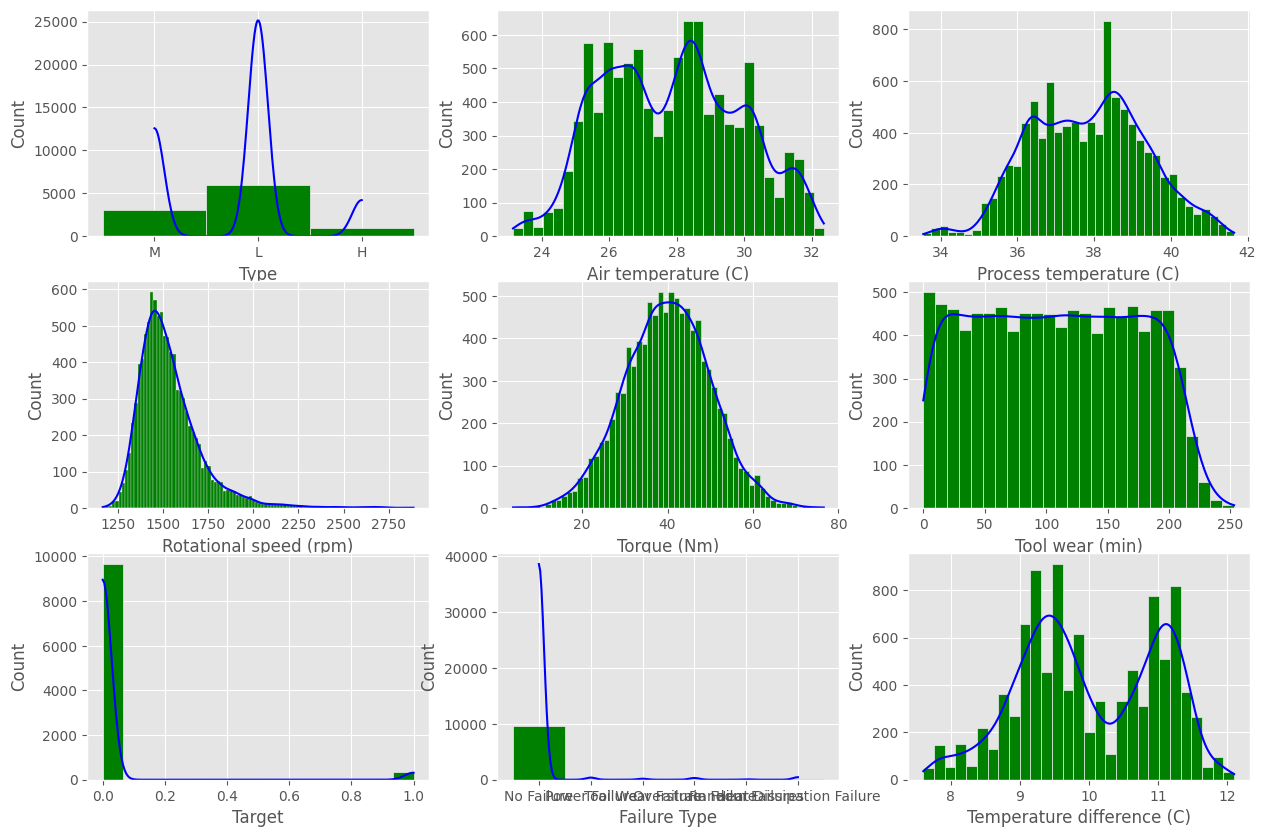

In [10]:
plt.figure(figsize=(15, 10))

for i,col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df[col], kde=True, color = "blue", facecolor = "green")

<Figure size 1500x1000 with 0 Axes>

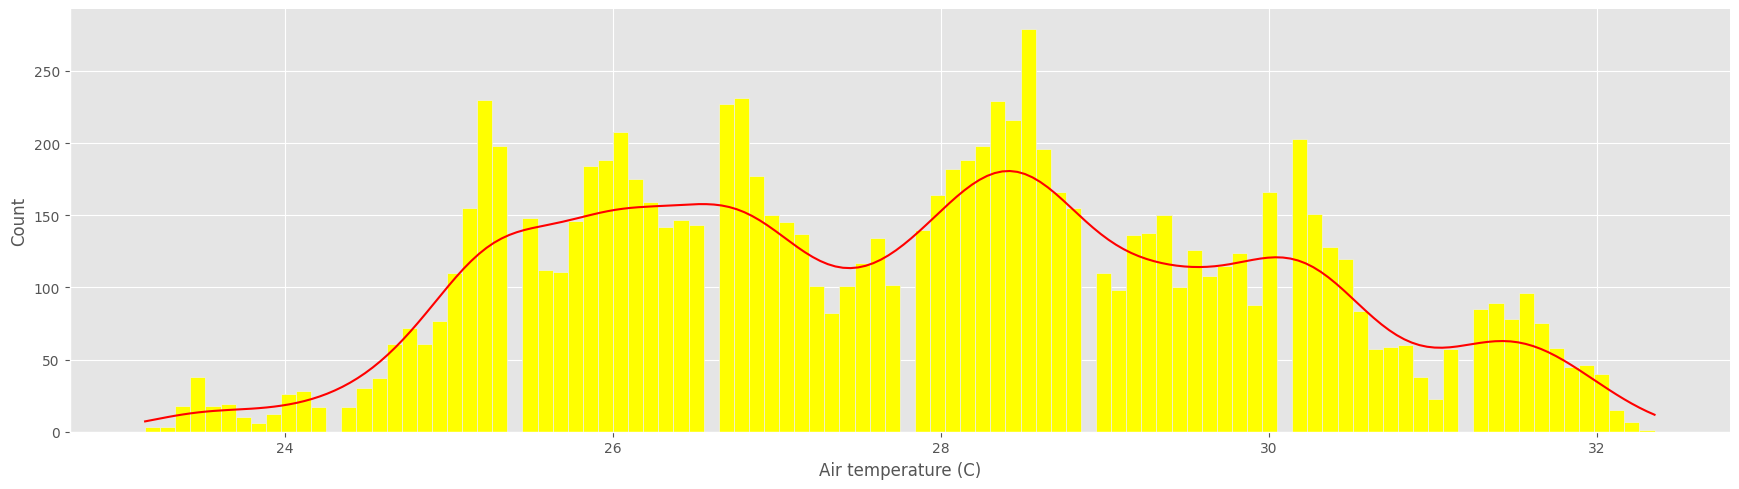

In [11]:
plt.figure(figsize=(15, 10))
sns.displot(
    data = df, 
    x = "Air temperature (C)",
    kde = True, bins = 100, color = "red", facecolor = "yellow", height = 5, aspect = 3.5
);

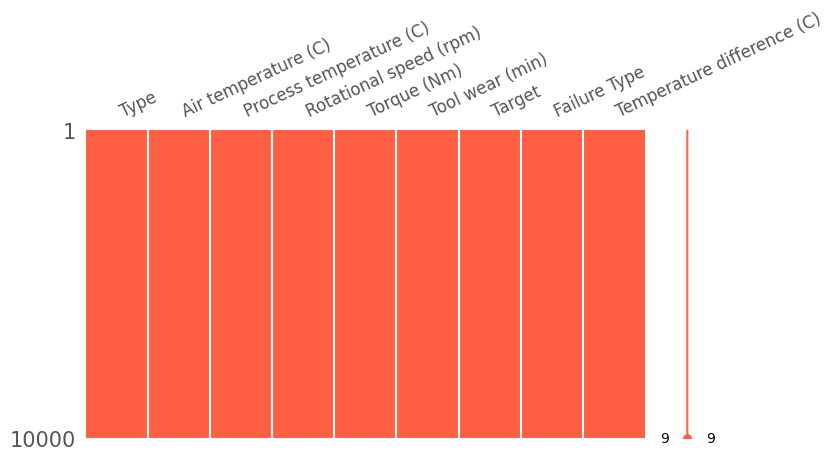

In [12]:
import missingno as msno

msno.matrix(df, figsize=(8,4), fontsize=12, color=(1, 0.38, 0.27));
plt.xticks(rotation=25);

In [13]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts()) 
    print("----"*8)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
--------------------------------
Target
0    9661
1     339
Name: count, dtype: int64
--------------------------------
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
--------------------------------


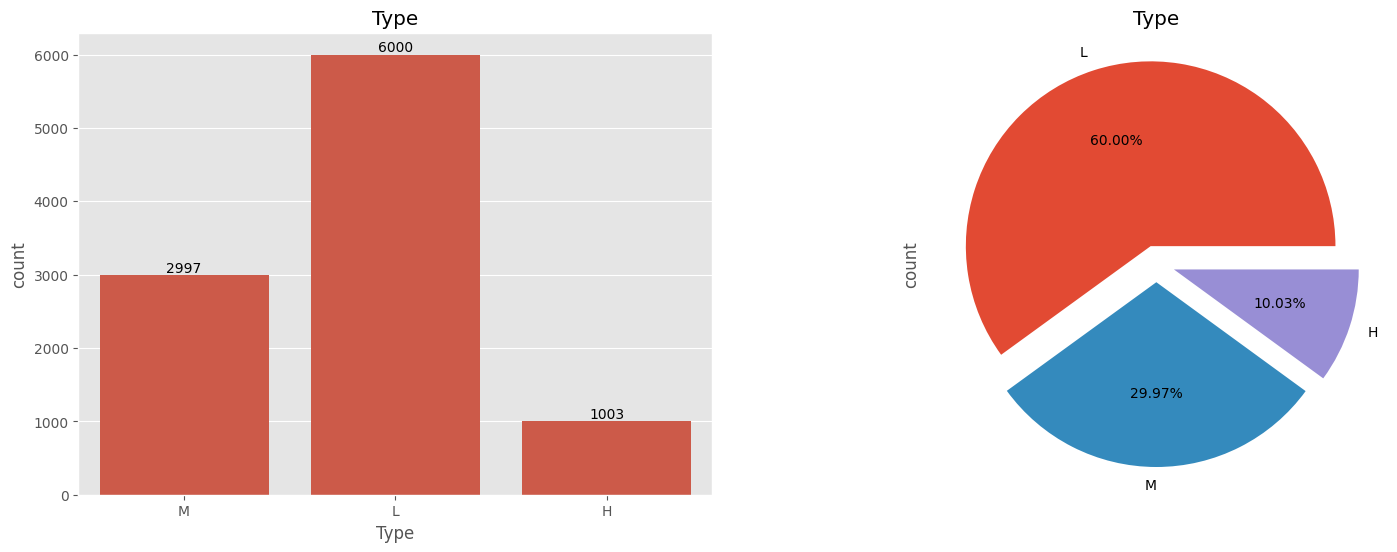

In [14]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])

plt.title("Type")
ax = plt.subplot(1,2,2)
ax = df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1], autopct='%1.2f%%');
ax.set_title(label = "Type");

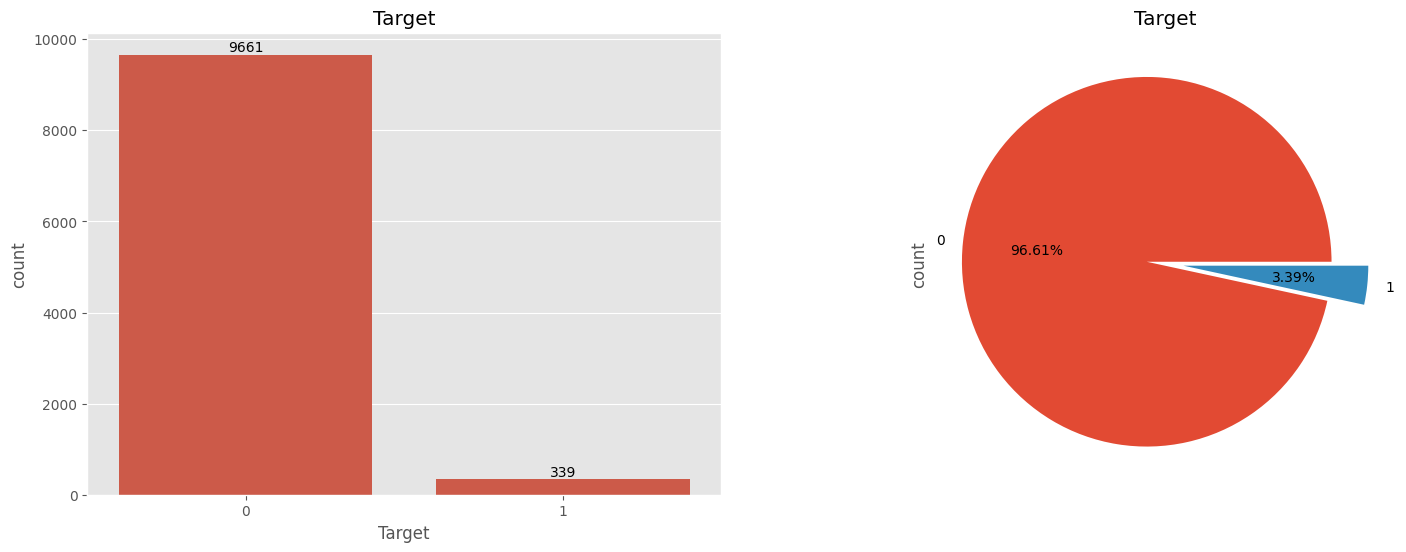

In [15]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target")

ax = plt.subplot(1,2,2)
ax = df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%');
ax.set_title(label = "Target");

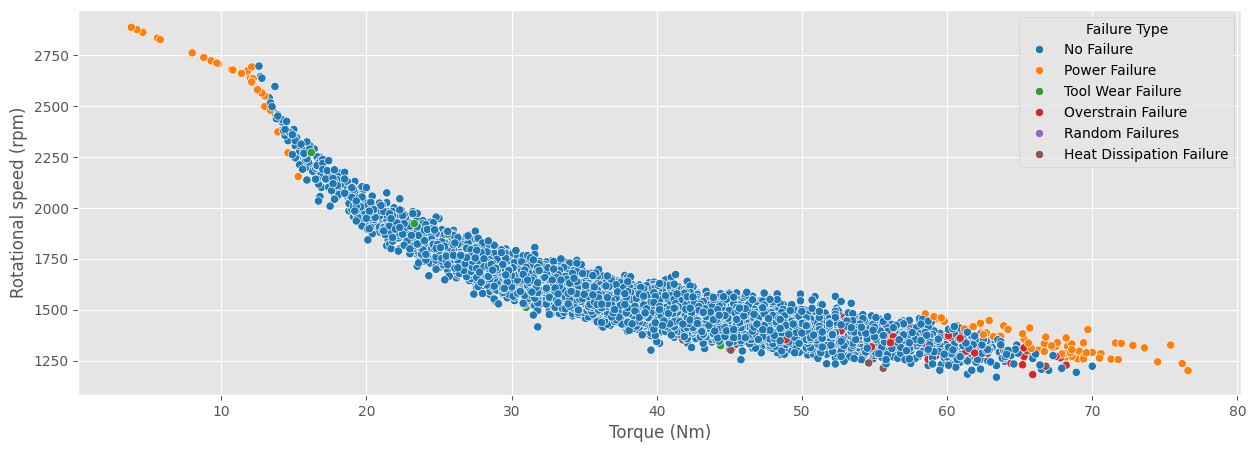

In [16]:
plt.figure(figsize = (15,5))
sns.scatterplot(
    data = df, 
    x = "Torque (Nm)", 
    y = "Rotational speed (rpm)", 
    hue = "Failure Type", 
    palette = "tab10"
);

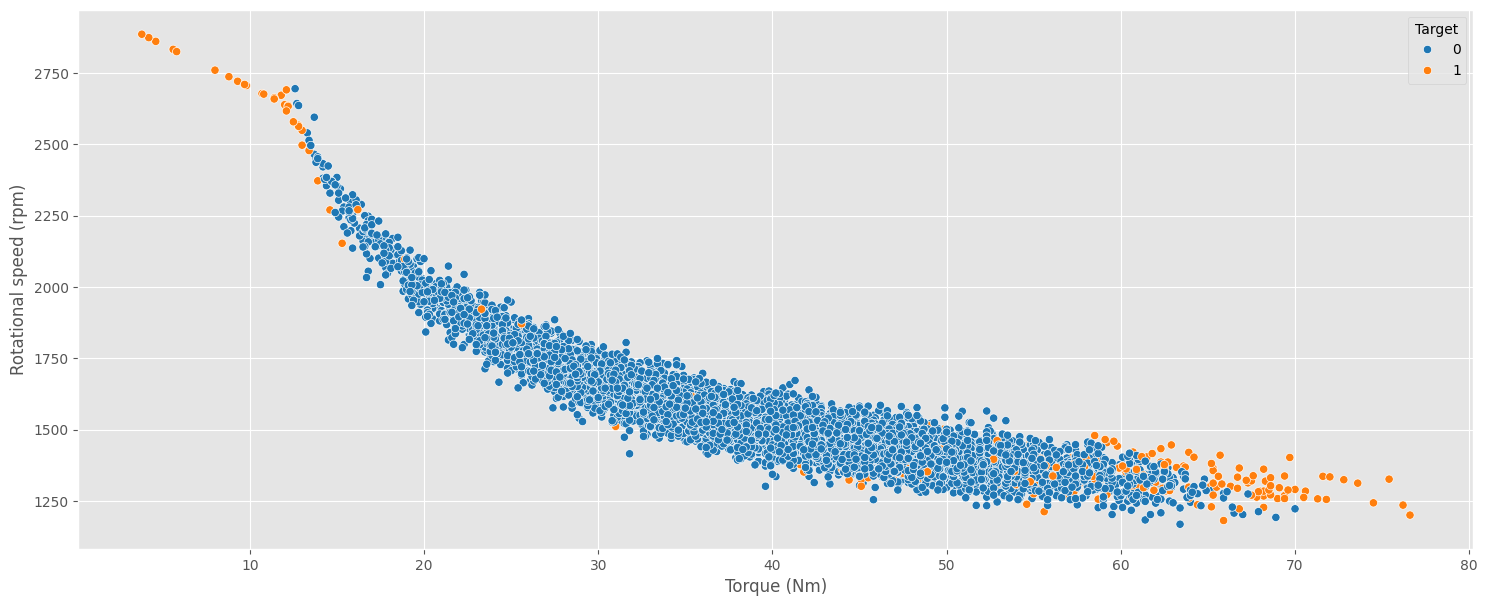

In [17]:
plt.figure(figsize=(18,7))
sns.scatterplot(
    data=df, 
    x="Torque (Nm)", 
    y="Rotational speed (rpm)", 
    hue="Target",
    palette="tab10"
);

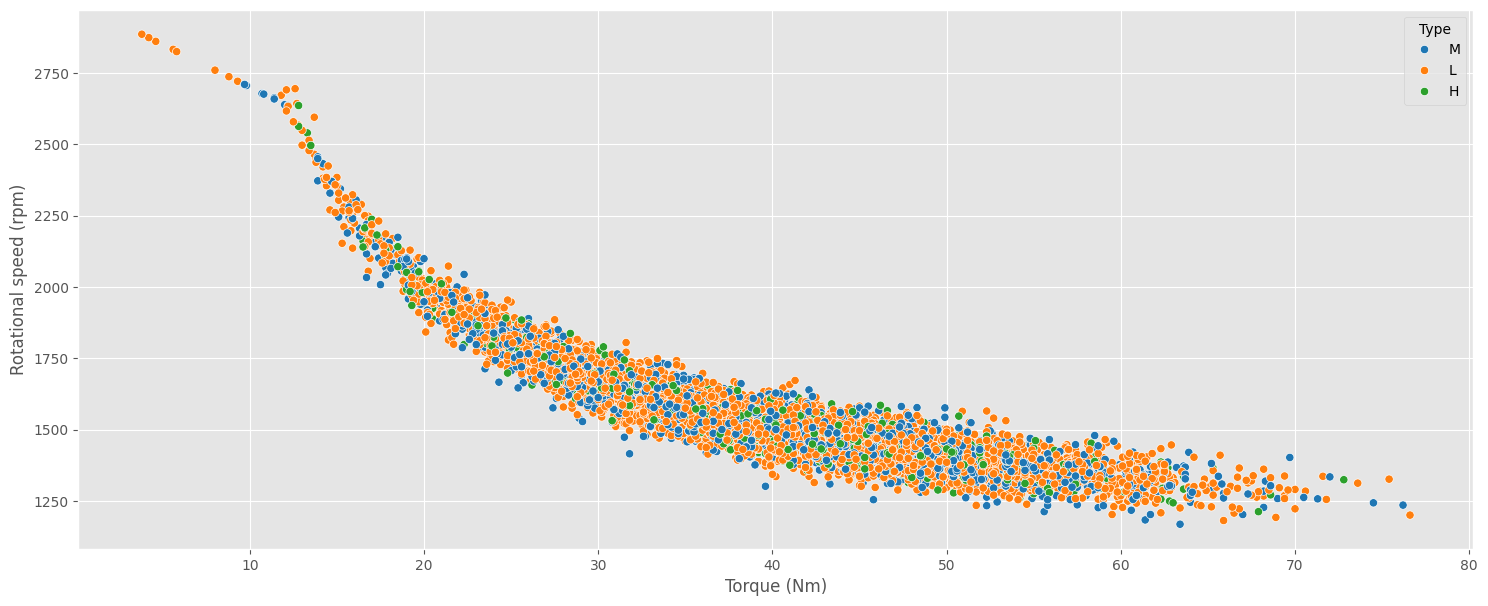

In [18]:
plt.figure(figsize=(18,7))
sns.scatterplot(
    data=df, 
    x="Torque (Nm)", 
    y="Rotational speed (rpm)", 
    hue="Type",
    palette="tab10"
);

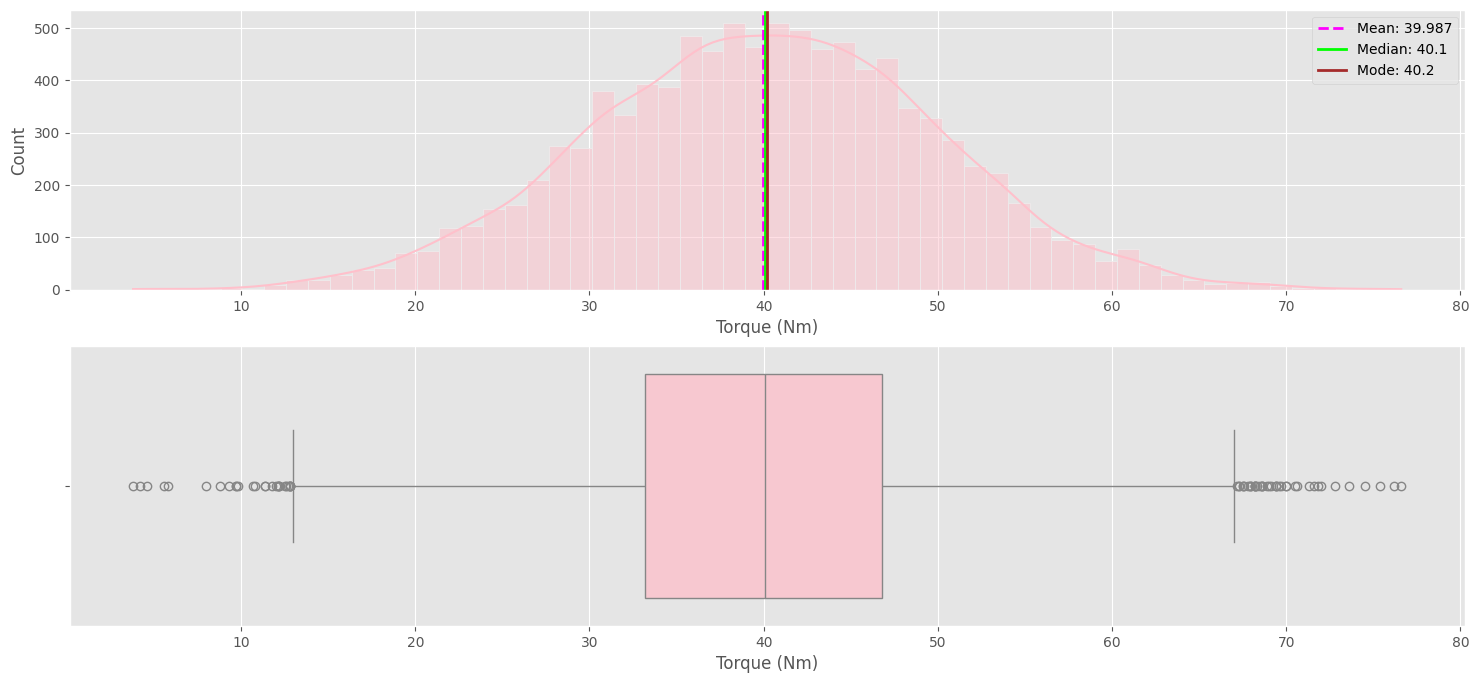

In [19]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='pink')

    ax[0].axvline(x = df[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='pink')
    
    plt.show()

plot_hist('Torque (Nm)')

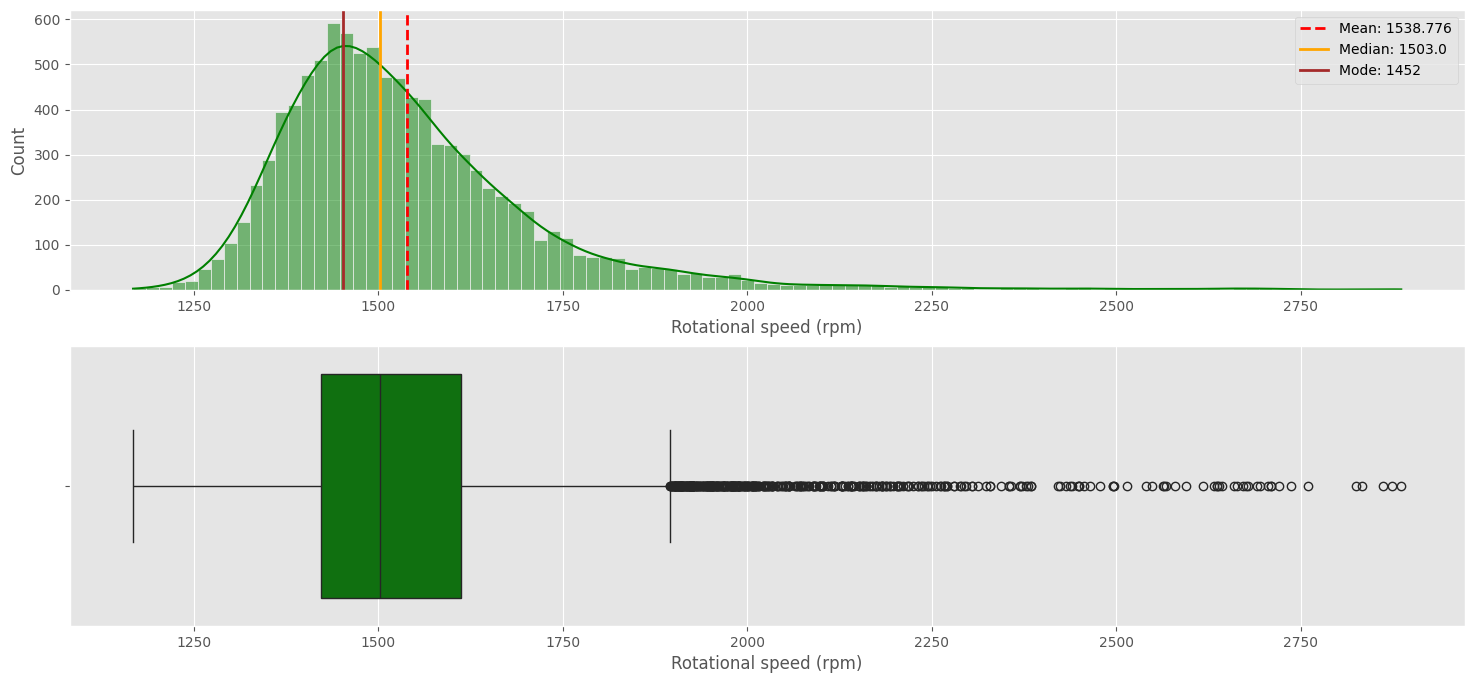

In [20]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Rotational speed (rpm)')

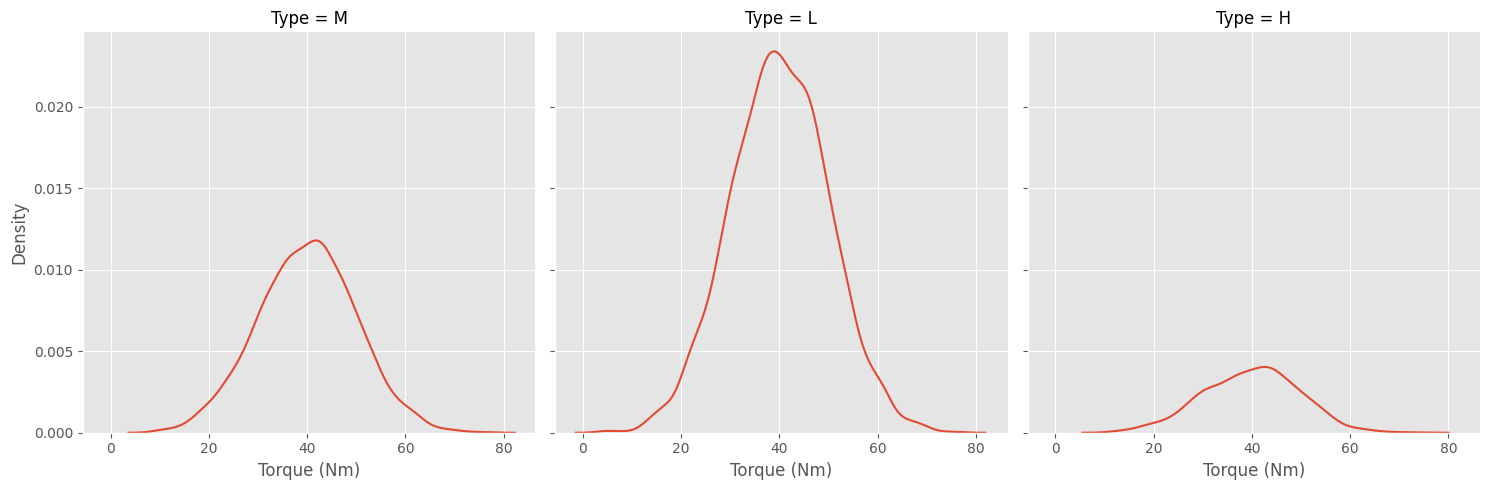

In [21]:
sns.displot(data=df, x="Torque (Nm)", col="Type", kind="kde");

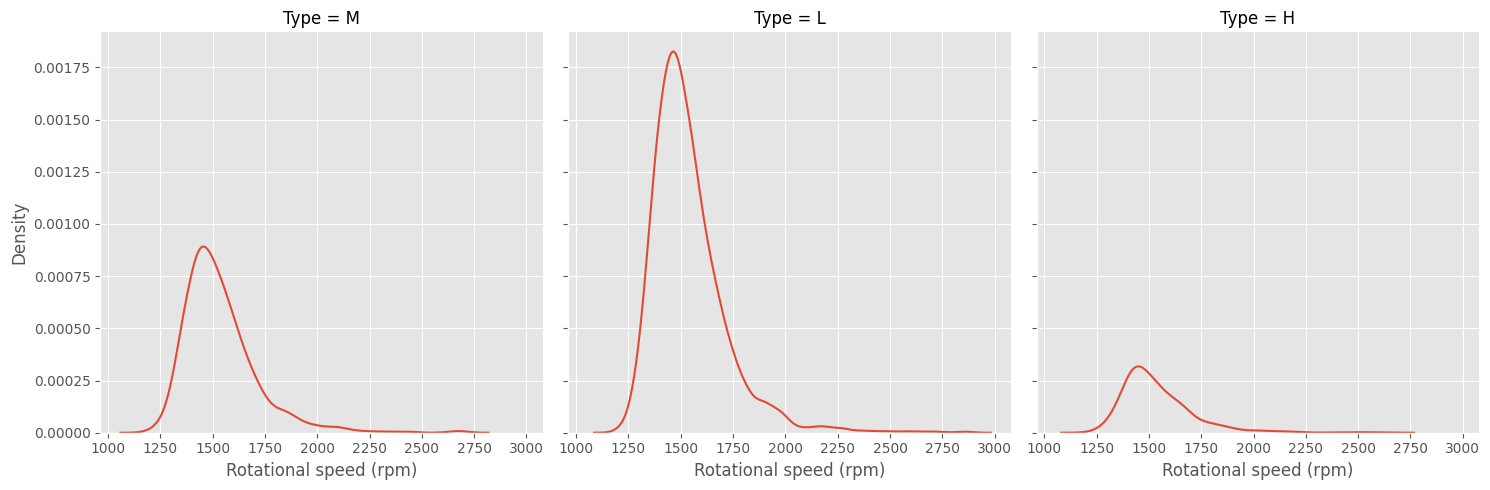

In [22]:
sns.displot(data=df, x="Rotational speed (rpm)", col="Type", kind="kde");

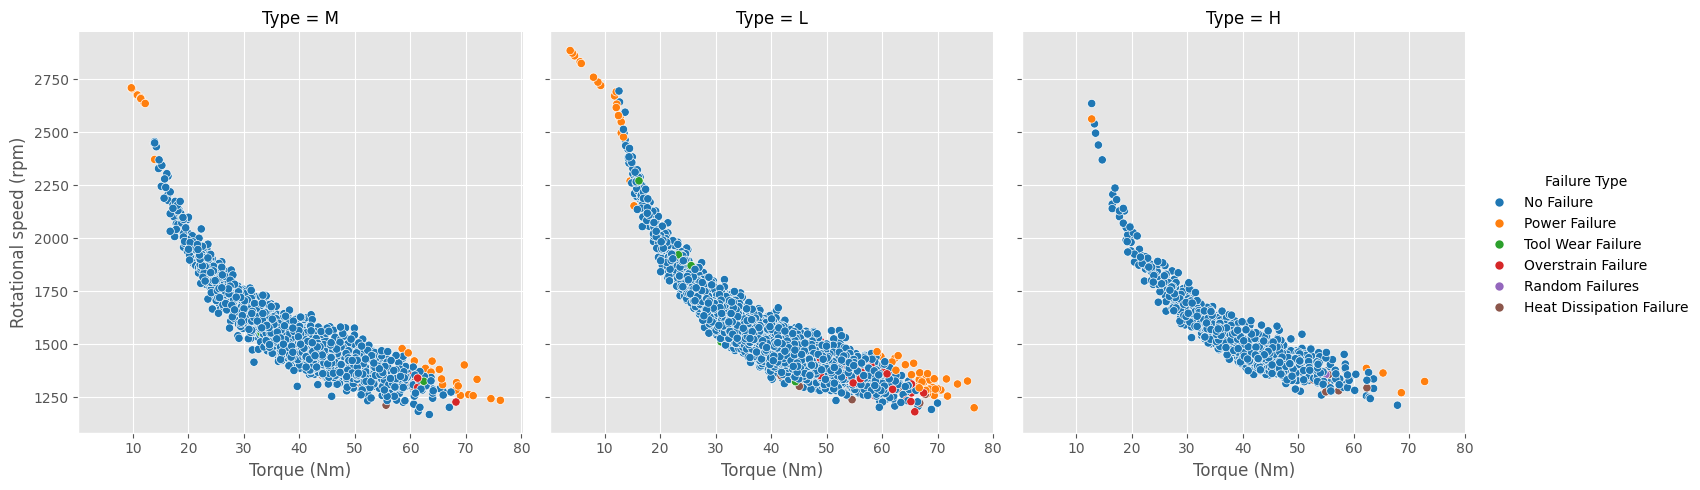

In [23]:
sns.relplot(data=df, x="Torque (Nm)", y="Rotational speed (rpm)", hue="Failure Type", col="Type", palette='tab10');

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'M'

<Figure size 1500x1000 with 0 Axes>

## Feature Selection

In [26]:
# Category Encoder
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

,Type,Air temperature (C),Process temperature (C),Rotational speed (rpm),Torque (Nm),Tool wear (min),Target,Failure Type,Temperature difference (C)
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5


In [27]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])
df.head(2)

,Type,Air temperature (C),Process temperature (C),Rotational speed (rpm),Torque (Nm),Tool wear (min),Target,Failure Type,Temperature difference (C)
0,1,25.95,36.45,1551,42.8,0,0,0,10.5
1,2,26.05,36.55,1408,46.3,3,0,0,10.5


In [28]:
X = df.drop(columns=["Failure Type", "Target", "Temperature difference (C)"] , axis=1)
y = df["Failure Type"]
y.sample(6)

2151    0
2797    0
5773    0
2397    0
2755    0
4764    0
Name: Failure Type, dtype: int64

In [29]:
X.sample(6)

,Type,Air temperature (C),Process temperature (C),Rotational speed (rpm),Torque (Nm),Tool wear (min)
9122,2,25.25,36.25,1580,41.2,66
2127,3,27.15,36.85,1425,40.6,123
2862,2,28.45,37.35,1867,23.0,242
3212,2,28.15,37.05,1649,32.4,50
1779,1,26.45,36.05,1488,44.0,43
8604,2,25.25,36.05,1297,52.1,211


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

/tmp/ipykernel_29076/3554457543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = y_train, palette = 'tab10')


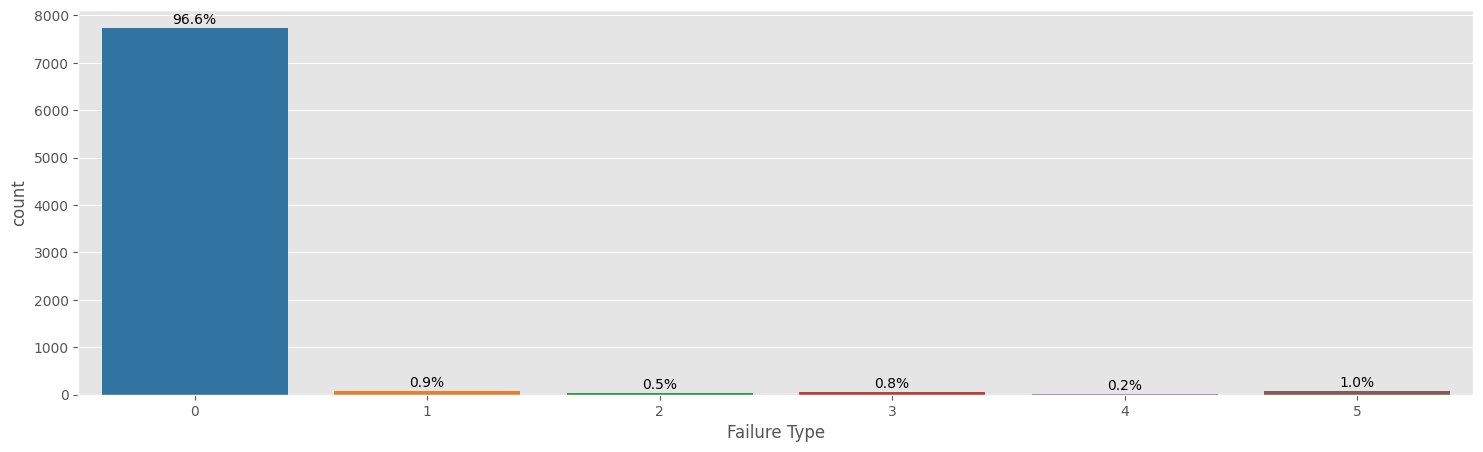

In [31]:
plt.figure(figsize = (18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t = len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

/tmp/ipykernel_29076/3119965971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = y_test, palette = 'tab10')


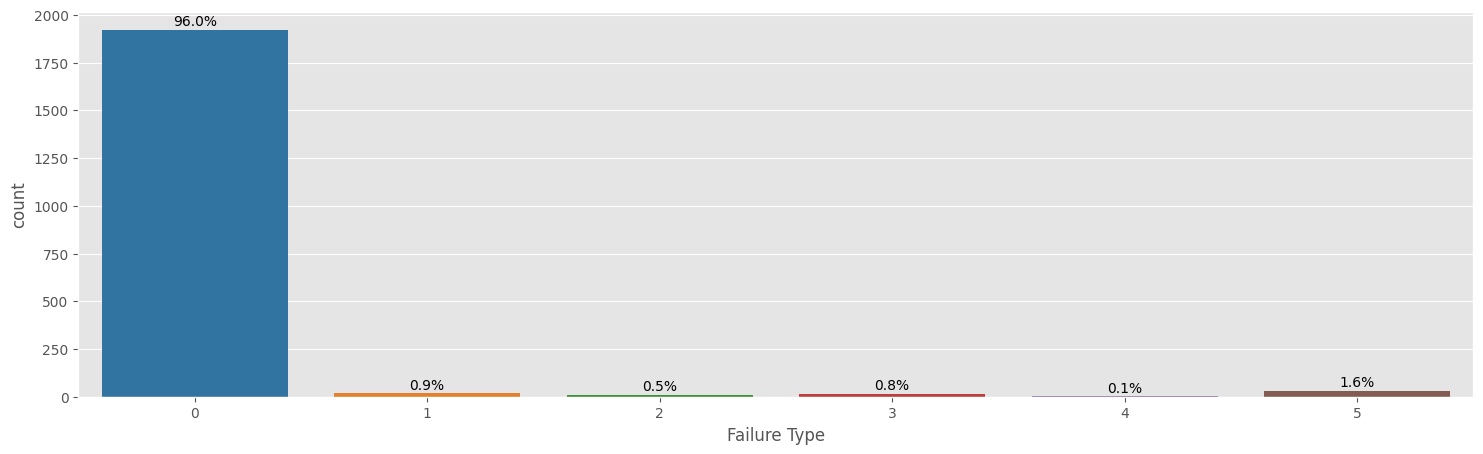

In [32]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_test, palette = 'tab10')
t = len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

# II. Model Selection

## 1. Using Logistic Regression

In [33]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

/home/linh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Accuracy    : 96.7 %
Model Accuracy Score : 96.2 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.67      0.25      0.36        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.27      0.21      0.22      2000
weighted avg       0.93      0.96      0.95      2000

--------------------------------------------------------


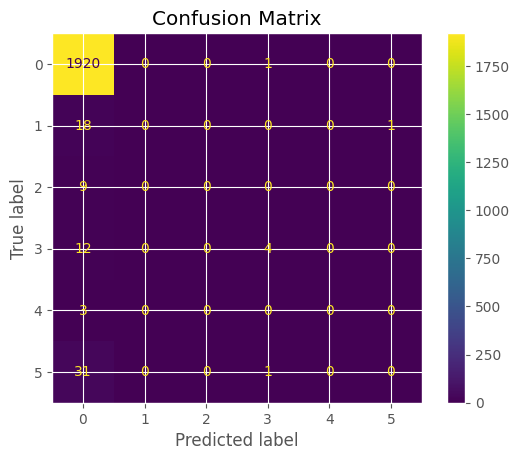

In [34]:
# Classification Report
print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test);
plt.title('Confusion Matrix');

## 2. Using Decision Tree Classifier

In [35]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

Training Accuracy    : 100.0 %
Model Accuracy Score : 97.85 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1921
           1       0.77      0.89      0.83        19
           2       0.17      0.11      0.13         9
           3       0.73      0.69      0.71        16
           4       0.00      0.00      0.00         3
           5       0.84      0.84      0.84        32

    accuracy                           0.98      2000
   macro avg       0.58      0.59      0.58      2000
weighted avg       0.98      0.98      0.98      2000

--------------------------------------------------------


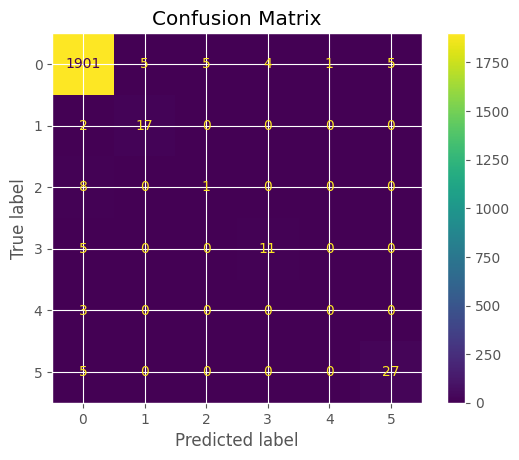

In [36]:
# Classification Report
print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(decision, X_test, y_test);
plt.title('Confusion Matrix');

## 3. Random Forest Classifier

In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.35 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1921
           1       0.95      1.00      0.97        19
           2       0.00      0.00      0.00         9
           3       1.00      0.69      0.81        16
           4       0.00      0.00      0.00         3
           5       1.00      0.53      0.69        32

    accuracy                           0.98      2000
   macro avg       0.66      0.54      0.58      2000
weighted avg       0.98      0.98      0.98      2000

--------------------------------------------------------


/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


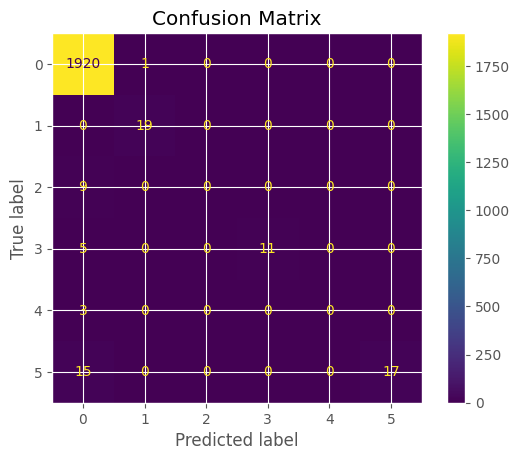

In [38]:
# Classification Report
print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

## 4. Support Vector Machines SVM

In [39]:
# Support Vector Machines
from sklearn.svm import SVC

# Kernel : 'precomputed', 'sigmoid', 'linear', 'poly', 'rbf'
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

Training Accuracy    : 98.34 %
Model Accuracy Score : 97.7 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1921
           1       0.95      1.00      0.97        19
           2       0.00      0.00      0.00         9
           3       0.68      0.81      0.74        16
           4       0.00      0.00      0.00         3
           5       0.90      0.28      0.43        32

    accuracy                           0.98      2000
   macro avg       0.59      0.51      0.52      2000
weighted avg       0.97      0.98      0.97      2000

--------------------------------------------------------


/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


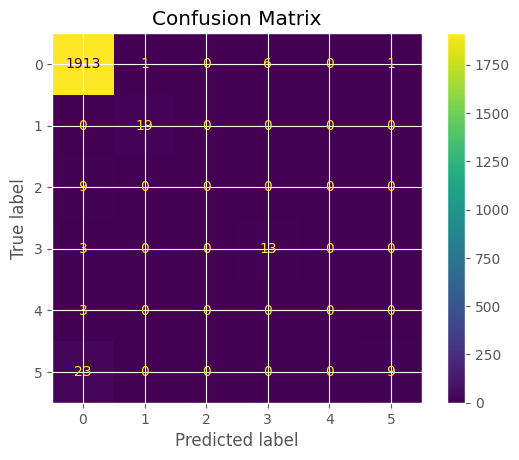

In [40]:
# Classification Report
print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test);
plt.title('Confusion Matrix');

## 5. Using k-nearest neighbors KNN

In [41]:
# KNN
# The optimal K value usually found is the square root of N, where N is the total number of samples

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

Training Accuracy    : 97.17 %
Model Accuracy Score : 97.7 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1921
           1       0.78      0.37      0.50        19
           2       0.00      0.00      0.00         9
           3       0.60      0.19      0.29        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.39      0.26      0.29      2000
weighted avg       0.94      0.96      0.95      2000

--------------------------------------------------------


/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


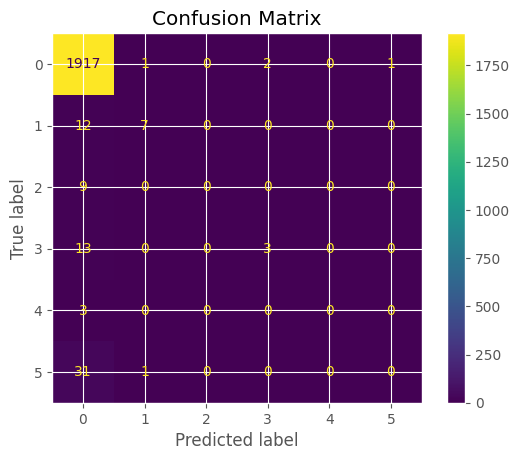

In [42]:
# Classification Report
print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test);
plt.title('Confusion Matrix');

## 6. Using XGBoost

In [43]:
y_train.head()

5504    0
5307    0
1684    0
2441    0
0       0
Name: Failure Type, dtype: int64

In [44]:
# XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.45 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1921
           1       0.74      0.74      0.74        19
           2       0.00      0.00      0.00         9
           3       1.00      0.81      0.90        16
           4       0.00      0.00      0.00         3
           5       0.91      0.91      0.91        32

    accuracy                           0.98      2000
   macro avg       0.61      0.58      0.59      2000
weighted avg       0.98      0.98      0.98      2000

--------------------------------------------------------


/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


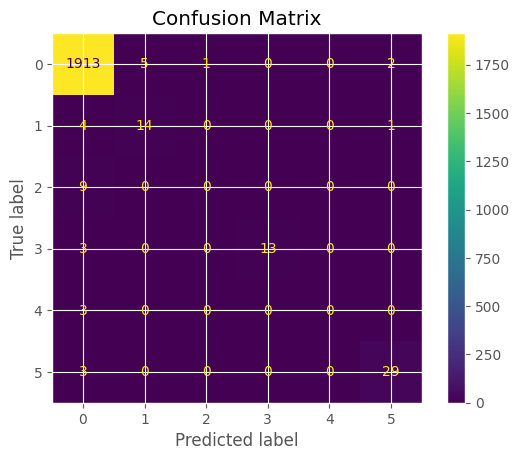

In [45]:
# Classification Report
print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test);
plt.title('Confusion Matrix');

# 3. Model Building  📚

In [46]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Random Forest', 'Support Vector Machines', 'KNN','XGBoost'],
    'Training Accuracy': [log_train, decision_train, random_forest_train, svc_train, knn_train, xgb_train],
    'Model Accuracy Score': [log_accuracy, decision_accuracy, random_forest_accuracy, svc_accuracy, knn_accuracy, xgb_accuracy]
})

In [47]:
pd.set_option('display.precision', 2)

models.sort_values(
    by='Model Accuracy Score', ascending=False
).style.background_gradient(cmap='coolwarm').hide(axis="index").set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,Model Accuracy Score
XGBoost,100.000000,98.450000
Random Forest,100.000000,98.350000
Decision Tree,100.000000,97.850000
Support Vector Machines,98.340000,97.700000
KNN,97.170000,97.700000
Logistic Regression,96.700000,96.200000


## Result

In [48]:
prediction_1 = random_forest.predict(X_test)

/tmp/ipykernel_29076/239121487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = prediction_1, palette = 'tab10')


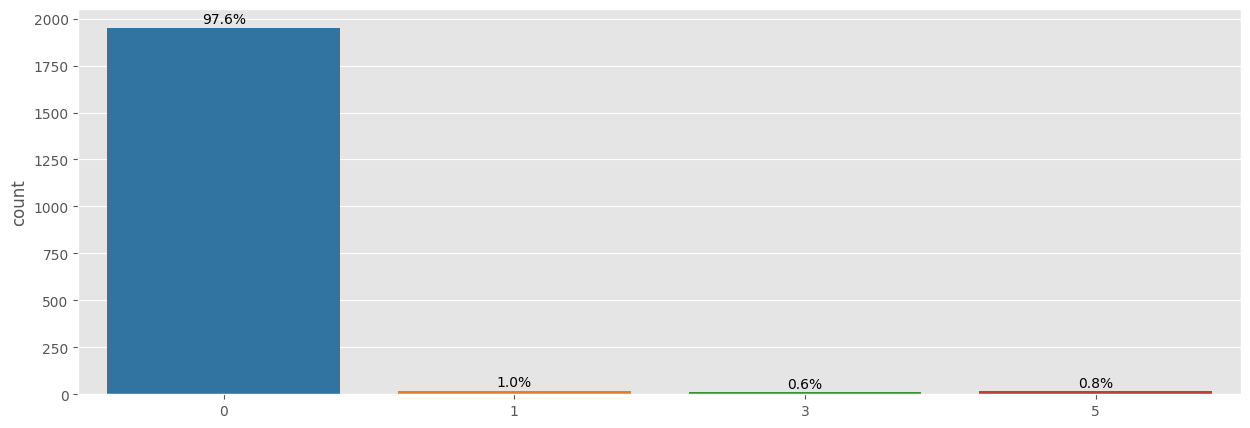

In [49]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(x = prediction_1, palette = 'tab10')
t = len(prediction_1)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

/tmp/ipykernel_29076/1553333503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = y_test, palette = 'tab10')


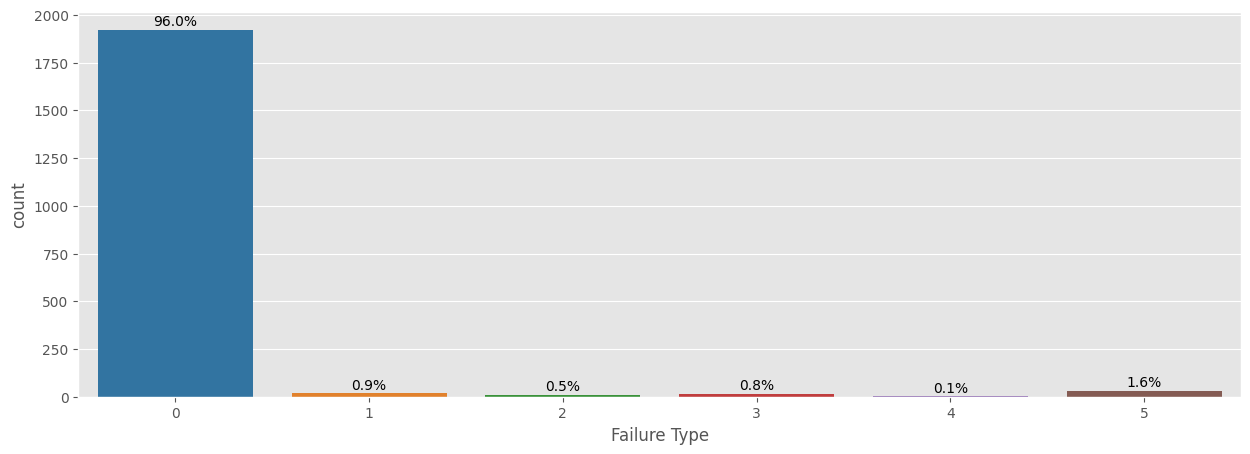

In [50]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(x = y_test, palette = 'tab10')
t = len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

In [51]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
1112,0,0
1062,0,0
7064,0,0
7269,0,0
6672,0,0
